# Dask
Background: dask_tutorial in github

## Overview 
Dask provides multi-core and distributed parallel execution on larger-than-memory datasets.

We can think of Dask at a high and a low level

*  **High level collections:**  Dask provides high-level Array, Bag, and DataFrame
   collections that mimic NumPy, lists, and Pandas but can operate in parallel on
   datasets that don't fit into memory.  Dask's high-level collections are
   alternatives to NumPy and Pandas for large datasets.
*  **Low Level schedulers:** Dask provides dynamic task schedulers that
   execute task graphs in parallel.  These execution engines power the
   high-level collections mentioned above but can also power custom,
   user-defined workloads.  These schedulers are low-latency (around 1ms) and
   work hard to run computations in a small memory footprint.  Dask's
   schedulers are an alternative to direct use of `threading` or
   `multiprocessing` libraries in complex cases or other task scheduling
   systems like `Luigi` or `IPython parallel`.

Different users operate at different levels but it is useful to understand
both.

The Dask [use cases](https://stories.dask.org/en/latest/) provides a number of sample workflows where Dask should be a good fit.

## Dask Setup

### Install Dask
You can install dask with conda, with pip, or by installing from source.

#### Conda
Dask is installed by default in Anaconda. You can update Dask using the conda command:
conda install dask

#### Pip
pip install dask 

Dask has many ways of executing code in parallel. Let us start with dask.distributed.Client.

In [17]:
from dask.distributed import Client

# Let us start with number of workers as 4
cliet = Client(n_workers=4)

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64656 instead
  warnings.warn(


In [26]:
from time import sleep

def square(x):
    sleep(1)
    return x**2

def power(x,y):
    sleep(1)
    return x**y


In [27]:
%%time
x = square(2)
y = square(3)
z = power(x,y)

CPU times: user 233 ms, sys: 50.4 ms, total: 283 ms
Wall time: 3.01 s


## Parallelize code with `dask.delayed`

This is a simple way to use `dask` to parallelize existing codebases or build [complex systems](https://blog.dask.org/2018/02/09/credit-models-with-dask).  This will also help us to develop an understanding for later sections.

**Related Documentation**

* [Delayed documentation](https://docs.dask.org/en/latest/delayed.html)
* [Delayed screencast](https://www.youtube.com/watch?v=SHqFmynRxVU)
* [Delayed API](https://docs.dask.org/en/latest/delayed-api.html)
* [Delayed examples](https://examples.dask.org/delayed.html)
* [Delayed best practices](https://docs.dask.org/en/latest/delayed-best-practices.html)

In [28]:
from dask import delayed 

In [30]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(square)(2)
y = delayed(square)(3)
z = delayed(power)(x, y)

CPU times: user 1.44 ms, sys: 965 µs, total: 2.4 ms
Wall time: 1.71 ms


In [32]:
%%time
z.compute()

CPU times: user 123 ms, sys: 26.2 ms, total: 150 ms
Wall time: 2.02 s


262144

In [34]:
type(z)

dask.delayed.Delayed

In [35]:
z

Delayed('power-6e788e81-cf9f-4412-ad60-15478cc3fa97')

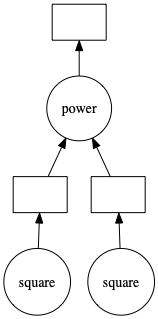

In [36]:
z.visualize()